<a href="https://colab.research.google.com/github/DAVIDCRUZ0202/DS-Unit-2-Applied-Modeling/blob/master/LS_DS_233_assignment_David_Cruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [0]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving database.csv to database (4).csv


In [0]:
df = pd.read_csv('database.csv')

df.columns

Index(['Report Number', 'Supplemental Number', 'Accident Year',
       'Accident Date/Time', 'Operator ID', 'Operator Name',
       'Pipeline/Facility Name', 'Pipeline Location', 'Pipeline Type',
       'Liquid Type', 'Liquid Subtype', 'Liquid Name', 'Accident City',
       'Accident County', 'Accident State', 'Accident Latitude',
       'Accident Longitude', 'Cause Category', 'Cause Subcategory',
       'Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Liquid Ignition',
       'Liquid Explosion', 'Pipeline Shutdown', 'Shutdown Date/Time',
       'Restart Date/Time', 'Public Evacuations', 'Operator Employee Injuries',
       'Operator Contractor Injuries', 'Emergency Responder Injuries',
       'Other Injuries', 'Public Injuries', 'All Injuries',
       'Operator Employee Fatalities', 'Operator Contractor Fatalities',
       'Emergency Responder Fatalities', 'Other Fatalities',
       'Public Fatalities', 'All

In [0]:
df['Cause Category'].value_counts(normalize=True)

MATERIAL/WELD/EQUIP FAILURE    0.513417
CORROSION                      0.211807
INCORRECT OPERATION            0.135242
NATURAL FORCE DAMAGE           0.042218
ALL OTHER CAUSES               0.042218
EXCAVATION DAMAGE              0.034705
OTHER OUTSIDE FORCE DAMAGE     0.020394
Name: Cause Category, dtype: float64

In [0]:
df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [0]:
df['Accident Year'].value_counts()

2015    462
2014    454
2016    415
2013    401
2012    366
2010    350
2011    345
2017      2
Name: Accident Year, dtype: int64

In [0]:
# Our target is the "Cause Category"
# Above is the distribution of the target
# there are 7 different classes, with the majority class happening 51% of the time.
# For accuracy, we can just use the majority class since it clocks in at 51%. This is a solid baseline.


# For Train/Val/Test split, I will use years to separate each. I'll make the training set 2010-2012, and the validation set 2013-2015.
# My test set will be the year of 2016-17.

# This is a classification problem. The classes are imbalanced, and we should expect
# to see much more of our majority class than the outliers. 

# As far as cleaning and exploration, we already know to remove the "Cause Subcategory".
# so that we remove data leakage associated with it. This Column is directly related to "Cause Category"

# Perform Split
# Wrangle Function
# Arrange Features and Targets
# Fit Model
# Validate
# permutations and feature importance


In [0]:
# Split
# These are time-based splits, so we will not use the model_selection of train_test_split
# We are splitting on the df['Accident Year']

import numpy as np
import pandas as pd

train = df[df['Accident Year'] <= 2012]
test = df[df['Accident Year'] >= 2016]
val = df[df['Accident Year'] >= 2013]
val = val[val['Accident Year'] < 2016]


print(train.shape, val.shape, test.shape)

print(train['Accident Year'].value_counts())

print(val['Accident Year'].value_counts())

print(test['Accident Year'].value_counts())

(1061, 48) (1317, 48) (417, 48)
2012    366
2010    350
2011    345
Name: Accident Year, dtype: int64
2015    462
2014    454
2013    401
Name: Accident Year, dtype: int64
2016    415
2017      2
Name: Accident Year, dtype: int64


In [0]:
# Wrangle Wresearch
# Any values to round to 0? no
# Any values with 0 that shouldnt? no
# Duplicate / Leaking Columns? Columns with Unique values or static values? **********Drop ['Report Number'], ['Cause Subcategory'], ['Supplemental Number'], 

df.nunique()

Report Number                           2795
Supplemental Number                     2795
Accident Year                              8
Accident Date/Time                      2777
Operator ID                              213
Operator Name                            229
Pipeline/Facility Name                  1977
Pipeline Location                          2
Pipeline Type                              4
Liquid Type                                5
Liquid Subtype                             8
Liquid Name                               69
Accident City                           1027
Accident County                          678
Accident State                            46
Accident Latitude                       2552
Accident Longitude                      2557
Cause Category                             7
Cause Subcategory                         38
Unintentional Release (Barrels)          697
Intentional Release (Barrels)            117
Liquid Recovery (Barrels)                539
Net Loss (

In [0]:
# Wrangle

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()

    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.

    
    # Drop Report Number( always varies) Cause Subcategory(data leakage)
    unusable_variance = ['Report Number', 'Cause Subcategory', 'Supplemental Number']
    X = X.drop(columns=unusable_variance)

    # Drop the columns with 0 feature importance
    more_variance = ['All Fatalities', 'Pipeline Location', 'Public Fatalities', 'Accident Date/Time',
                     'Accident Year', 'Liquid Explosion', 'Shutdown Date/Time', 'Restart Date/Time',
                     'Operator Employee Injuries', 'Operator Contractor Injuries', 'Emergency Responder Injuries',
                     'Other Injuries', 'Public Injuries', 'All Injuries', 'Operator Employee Fatalities',
                     'Operator Contractor Fatalities', 'Emergency Responder Fatalities', 'Other Fatalities']

    X = X.drop(columns=more_variance)

    

    # Engineer features!
    
    # return the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [0]:
# Arrange data into X features matrix and Y target vector
target = 'Cause Category'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [0]:
# Create and fit
!pip install category_encoders
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Operator Name', 'Pipeline/Facility Name',
                                      'Pipeline Type', 'Liquid Type',
                                      'Liquid Subtype', 'Liquid Name',
                                      'Accident City', 'Accident County',
                                      'Accident State', 'Liquid Ignition',
                                      'Pipeline Shutdown'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Operator Name',
                                          'dat...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=

In [0]:
# Validate
# Let's see our validation accuracy
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.5702353834472286


We beat baseline without hypertuning! Examining our features through Permutations will be the first step. By seeing feature importance, we can adjust what we want our model to focus on.

In [0]:
# Permutations
# Doing one Permutation manually just for the reps

feature = 'Operator Name'
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])  # The line!
score_permuted = pipeline.score(X_val_permuted, y_val)  # The other line!
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {feature}: {score_with}')
print(f'Validation Accuracy with {feature} permuted: {score_permuted}')
print(f'Permutation Importance: {score_with - score_permuted}')



Validation Accuracy with Operator Name: 0.5702353834472286
Validation Accuracy with Operator Name permuted: 0.5596051632498101
Permutation Importance: 0.010630220197418438


In [0]:
## Now let's use the eli5 library

transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer()
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)

model.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [0]:
permuter = PermutationImportance(
    model,
    scoring='accuracy',
    n_iter=5,  # Run each permutation 5 times and take the average
    random_state=42 # This is our seed for reproducibility and model tuning
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.1,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weight=1, missing=None,
                                              n_estimators=100, n_jobs=-1,
                                              nthread=None,
                                              objective='multi:softprob',
                                              random_state=42, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None,
                    

In [0]:
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(
    ascending=False)

Pipeline Type                           8.853455e-02
Property Damage Costs                   1.822323e-02
Liquid Subtype                          1.533789e-02
Unintentional Release (Barrels)         6.833713e-03
Liquid Ignition                         5.922551e-03
All Costs                               3.796507e-03
Operator Name                           3.037206e-03
Pipeline Shutdown                       2.277904e-03
Liquid Type                             1.670463e-03
Accident Latitude                       1.366743e-03
Other Costs                             1.063022e-03
Emergency Response Costs                9.111617e-04
Liquid Recovery (Barrels)               7.593014e-04
Accident City                           7.593014e-04
Environmental Remediation Costs         2.220446e-17
Public Evacuations                      2.220446e-17
Public/Private Property Damage Costs   -1.518603e-04
Accident Longitude                     -3.037206e-04
Pipeline/Facility Name                 -9.1116

In [0]:
# Let's Drop everything with 0 importance for a faster model. It won't decrease our score at all. 
# Lets keep it in the Wrangle function so that it's all being done in one shot.

## Go up to the wrangle function and pass in these columns to drop.

In [0]:
# Hypertuning
# We'll do this by trying different parameters on our model
# Stop using the pipeline approach just to try different parameters

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model1 = XGBClassifier(
    n_estimators=1000,  # Number of estimators - with a lot, will depend on early stopping
    max_depth=7,  # Deeper trees to help with high cardinality features
    learning_rate=0.5,  # Let's try a higher learning rate
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

model1.fit(X_train_encoded, y_train,
          eval_set=eval_set,
          eval_metric='merror',
          early_stopping_rounds=50)  # Stop if the score hasn't improved in 50 rounds

[0]	validation_0-merror:0.237512	validation_1-merror:0.472286
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.169651	validation_1-merror:0.464692
[2]	validation_0-merror:0.121583	validation_1-merror:0.459377
[3]	validation_0-merror:0.105561	validation_1-merror:0.455581
[4]	validation_0-merror:0.076343	validation_1-merror:0.454822
[5]	validation_0-merror:0.058435	validation_1-merror:0.459377
[6]	validation_0-merror:0.04147	validation_1-merror:0.457099
[7]	validation_0-merror:0.017908	validation_1-merror:0.452544
[8]	validation_0-merror:0.01131	validation_1-merror:0.454062
[9]	validation_0-merror:0.005655	validation_1-merror:0.459377
[10]	validation_0-merror:0.000943	validation_1-merror:0.460896
[11]	validation_0-merror:0	validation_1-merror:0.458618
[12]	validation_0-merror:0	validation_1-merror:0.460137
[13]	validation_0-merror:0	validation_1-merr

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

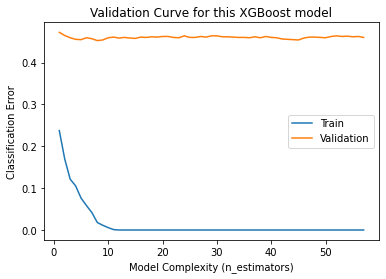

In [0]:
results = model1.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')
#plt.ylim((0.18, 0.22)) # Zoom in
plt.legend();

In [0]:
1 - 0.452544

0.5474559999999999

In [0]:
# We're still beating baseline, but our model is plateau-ing extremely quickly.
# Going to play around with it more in assignment 234